In [385]:
import opendatasets as od
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split 

In [386]:
od.download("https://www.kaggle.com/datasets/camnugent/california-housing-prices")

Skipping, found downloaded files in ".\california-housing-prices" (use force=True to force download)


In [387]:
df= pd.read_csv("california-housing-prices/housing.csv")


In [388]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [389]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [390]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Deal with missing values

In [391]:
df= df.fillna(0)
df["total_bedrooms"].replace(0,df["total_bedrooms"].mean())
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


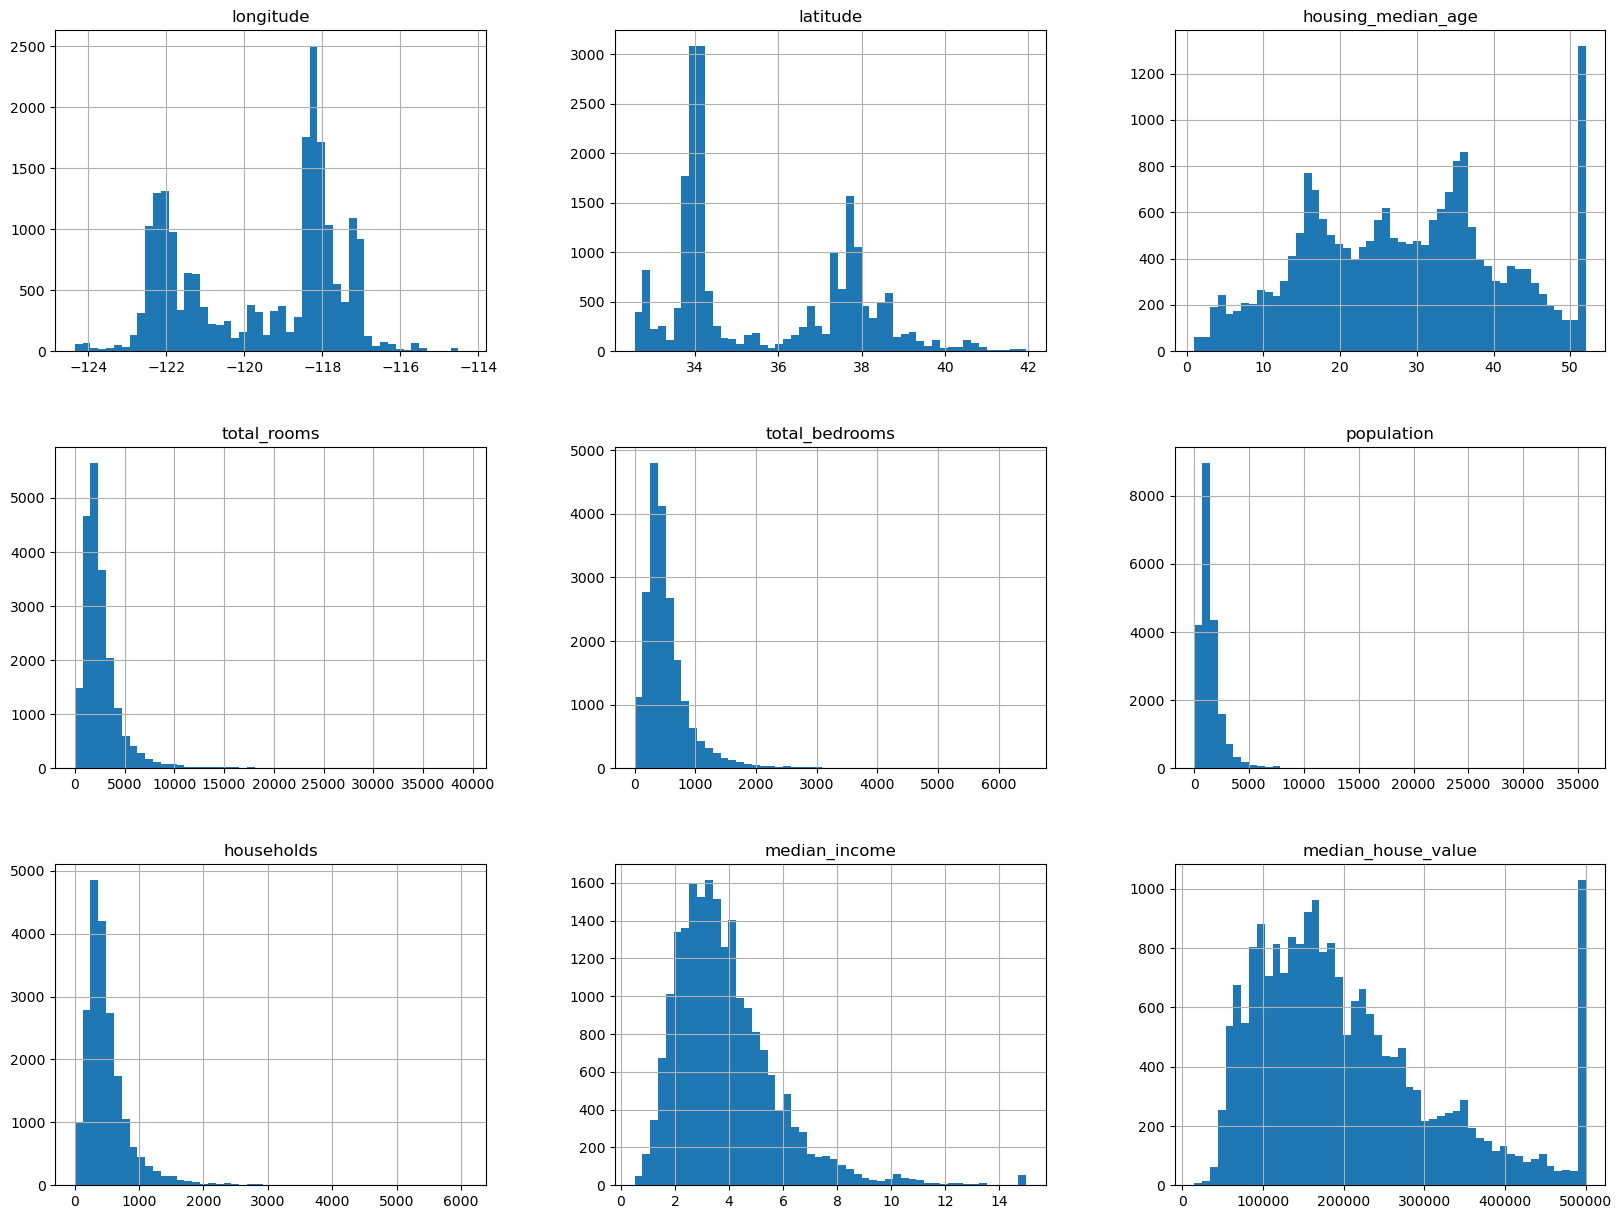

In [392]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [394]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

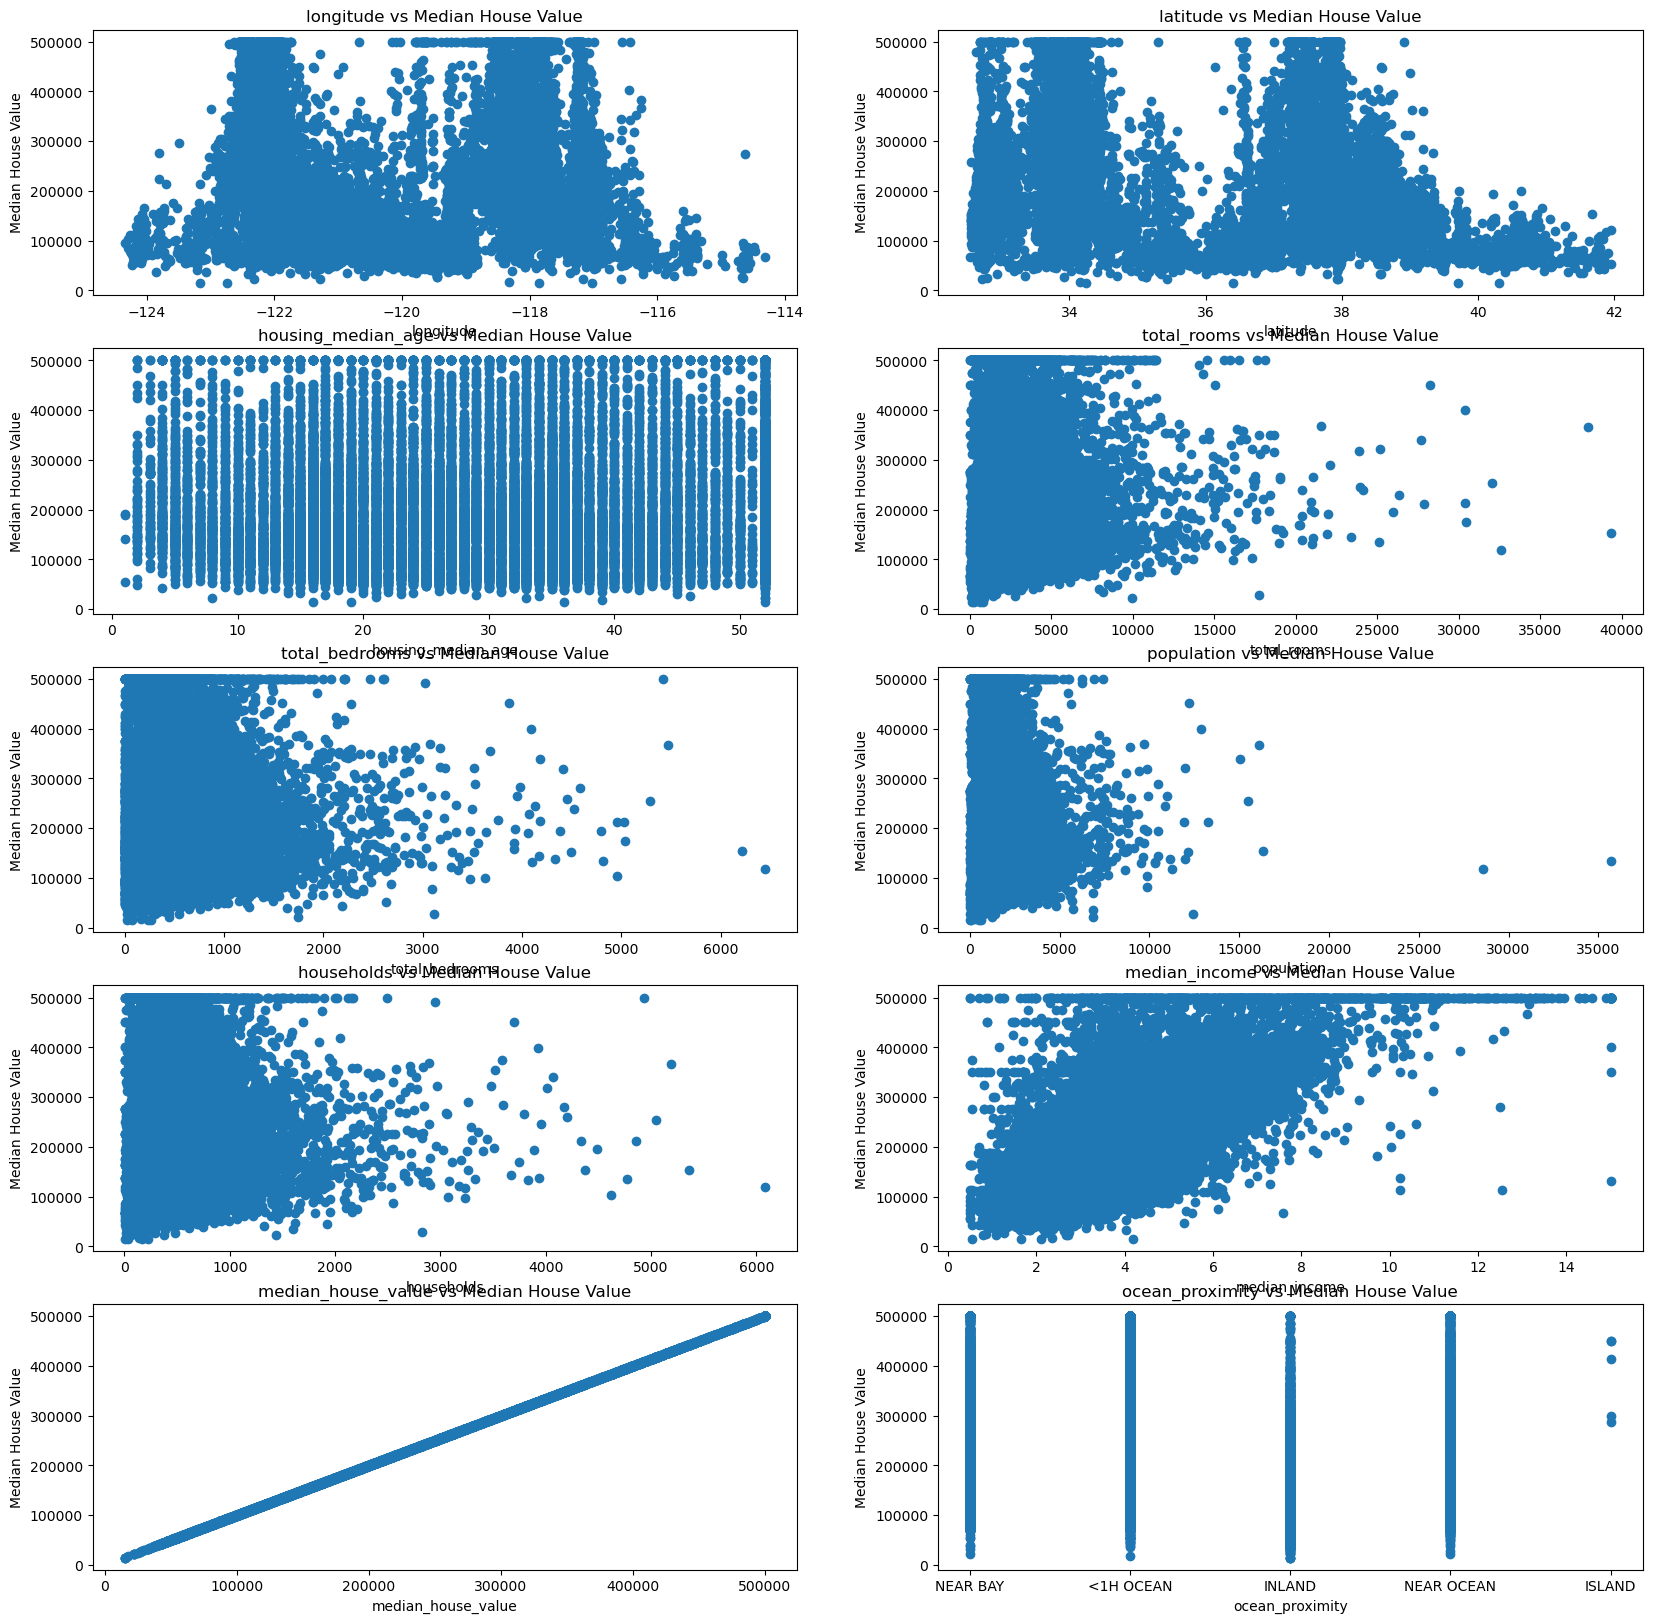

In [395]:
cols= list(df.columns)
fig, axes= plt.subplots(nrows= 5, ncols=2, figsize=(20,20))

for i, each in enumerate(cols):
    ax= plt.subplot(5,2, i+1)
    plt.scatter(df[each], df["median_house_value"]), 
    plt.title(f"{each} vs Median House Value")
    plt.xlabel(f"{each}")
    plt.ylabel("Median House Value")
    
plt.show()

A strong correlation in between "median income" and house value 

In [396]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Trying New attributes

In [397]:
df["rooms_per_household"]= df["total_rooms"]/df["households"]
df["bedrooms_per_household"]= df["total_bedrooms"]/df["households"]
df["population_per_household"]= df["population"]/df["households"]


Categorical to Numerical

In [398]:
# df= pd.concat([df ,pd.get_dummies(df, columns=["ocean_proximity"],prefix="Ocean", drop_first=True)])
# df.drop("ocean_proximity", axis=1, inplace=True)
# df= df.fillna(0)
# encoder= OneHotEncoder
# encoded=encoder.fit_transform(df[["ocean_proximity"]])
# encoded.head()

transformer = make_column_transformer(
    (OneHotEncoder(), ["ocean_proximity"]),
    remainder="passthrough"
)

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
transformed_df.head()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_<1H OCEAN,onehotencoder__x0_INLAND,onehotencoder__x0_ISLAND,onehotencoder__x0_NEAR BAY,onehotencoder__x0_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467


In [407]:
scalar= StandardScaler()
#scalar= MinMaxScaler()

scaled_df= pd.DataFrame(scalar.fit_transform(transformed_df), columns=transformed_df.columns)
scaled_df.describe()

,onehotencoder__x0_<1H OCEAN,onehotencoder__x0_INLAND,onehotencoder__x0_ISLAND,onehotencoder__x0_NEAR BAY,onehotencoder__x0_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,4.622042e-14,2.561624e-15,-2.352371e-15,-2.985514e-14,2.490398e-14,-1.426325e-12,-8.068474e-14,5.878911e-16,1.217104e-16,2.365867e-16,-7.506747e-17,2.462366e-16,-2.522018e-14,2.382354e-16,4.640911e-15,4.183294e-15,-7.361326e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-8.911557e-01,-6.818890e-01,-1.556621e-02,-3.532643e-01,-3.844665e-01,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.259798e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00,-1.852319e+00,-2.234009e+00,-2.290000e-01
25%,-8.911557e-01,-6.818890e-01,-1.556621e-02,-3.532643e-01,-3.844665e-01,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.689481e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01,-3.994496e-01,-1.679872e-01,-6.171062e-02
50%,-8.911557e-01,-6.818890e-01,-1.556621e-02,-3.532643e-01,-3.844665e-01,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.400849e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01,-8.078489e-02,-7.822943e-02,-2.431585e-02
75%,1.122138e+00,1.466514e+00,-1.556621e-02,-3.532643e-01,-3.844665e-01,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.620822e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01,2.519615e-01,2.631029e-02,2.037453e-02
max,1.122138e+00,1.466514e+00,6.424173e+01,2.830742e+00,2.601007e+00,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.398857e+01,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00,5.516324e+01,6.784063e+01,1.194191e+02


Split in train and test

In [400]:
y=scaled_df["median_house_value"]
x=scaled_df
x.drop("median_house_value", axis=1, inplace=True)
x.head()

,onehotencoder__x0_<1H OCEAN,onehotencoder__x0_INLAND,onehotencoder__x0_ISLAND,onehotencoder__x0_NEAR BAY,onehotencoder__x0_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
0,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.327835,1.052548,0.982143,-0.804819,-0.954593,-0.974429,-0.977033,2.344766,0.628559,-0.128048,-0.049597
1,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.322844,1.043185,-0.607019,2.045890,1.356913,0.861439,1.669961,2.332238,0.327041,-0.234865,-0.092512
2,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.332827,1.038503,1.856182,-0.535746,-0.810272,-0.820777,-0.843637,1.782699,1.155620,-0.025946,-0.025843
3,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.337818,1.038503,1.856182,-0.624215,-0.703806,-0.766028,-0.733781,0.932968,0.156966,-0.026742,-0.050329
4,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.337818,1.038503,1.856182,-0.462404,-0.597339,-0.759847,-0.629157,-0.012881,0.344711,-0.010241,-0.085616


In [377]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x = poly.fit_transform(x)

In [401]:
train_x, test_x ,train_y,test_y= train_test_split(x,y, test_size=0.3, random_state=133)


Prediction

In [402]:
model= LinearRegression().fit(train_x,train_y)

In [413]:
y_pred= model.predict(test_x)

In [412]:
print(model.score(train_x,train_y))

0.6411100355458286


In [411]:
print(model.score(test_x,test_y))

0.6596436869994515


In [410]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(test_y,y_pred)
rmse= np.sqrt(mse)
print(rmse)

0.5796141069184596
